<img src="https://upload.wikimedia.org/wikipedia/commons/0/02/Stack_Overflow_logo.svg"></img>

<h1><center><font size="6">What changed for a decade?</font></center></h1>

# Summary

The file follows the CRISP-DM model for data science. It conists of:
1. **Business understanding** - what we try to achieve here.
2. **Data understanding** - playing with the 2011 and 2020 development survey data. 
3. **Data preparation** - we don't do any ML actions here, but for 2011 there was a need of some data transformation to get the necessary insights. 
4. **Results** - instead of Modeling, Evaluation, and deployment of ML algorythm, we just shared the answers of the business questions based on data.

There is a blog post published on [medium.com](https://medium.com/@plamen.rabadzhiyski/what-has-changed-for-a-decade-fc5052fd0614) and [pmtonomy.com](https://pmtonomy.com/what-changed-for-a-decade/)

# 1. Business Understanding

We use the StackOveflow Survey from 2011 to compare to the one of 2020 and check what changed for the last ten years. We want to answer the below questions:
- **What were the most popular languages in 2011 and now?**
- **What were the top 10 countries in 2011 and now?**
- **Did Linux and Mac OS win the fight against Microsoft?**

We will do some exploratory data analyses and data manipulation to answer those questions.

# 2. Data Understanding

### Import Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
from plotly.offline import iplot
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
import cufflinks as cf
cf.go_offline()

### 2020 Data

**Import and check data**

In [2]:
# Import csv files 
df_2020 = pd.read_csv('2020_survey_results_public.csv')
schema_2020 = pd.read_csv('2020_survey_results_schema.csv')

In [3]:
# Check number of raws and columns
print("Stack Overflow 2020 Survey Results - rows:",df_2020.shape[0]," columns:", df_2020.shape[1])
print("Stack Overflow 2020 Description - rows:",schema_2020.shape[0]," columns:", schema_2020.shape[1])

Stack Overflow 2020 Survey Results - rows: 64461  columns: 61
Stack Overflow 2020 Description - rows: 61  columns: 2


In [4]:
# Check the survey data
pd.set_option('display.max_columns', None)
df_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [5]:
# Check the schema data
schema_2020.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


In [6]:
# check details about raws and columns
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [7]:
 # We use this function to check the description of a given column
def get_description(column_name, schema=schema_2020):
    '''
    INPUT - schema_2020 - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema_2020[schema_2020['Column'] == column_name]['QuestionText'])[0]
    return desc

get_description(df_2020.columns[1]) # Change the number in [] to get info about the column

'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'

**2020 missing data**

In [8]:
# check % of missing vlaues per column
total_df_2020 = df_2020.isnull().sum().sort_values(ascending = False)
percent = (df_2020.isnull().sum()/df_2020.isnull().count()*100).sort_values(ascending = False)
missing_df_2020  = pd.concat([total_df_2020, percent], axis=1,keys = ['Total','Percent'])
missing_df_2020

,Total,Percent
ConvertedComp,29705,46.082127
CompTotal,29635,45.973534
NEWPurchaseResearch,27140,42.102977
PurchaseWhat,25097,38.933619
WebframeDesireNextYear,24437,37.909744
...,...,...
Employment,607,0.941655
Country,389,0.603466
MainBranch,299,0.463846
Hobbyist,45,0.069810


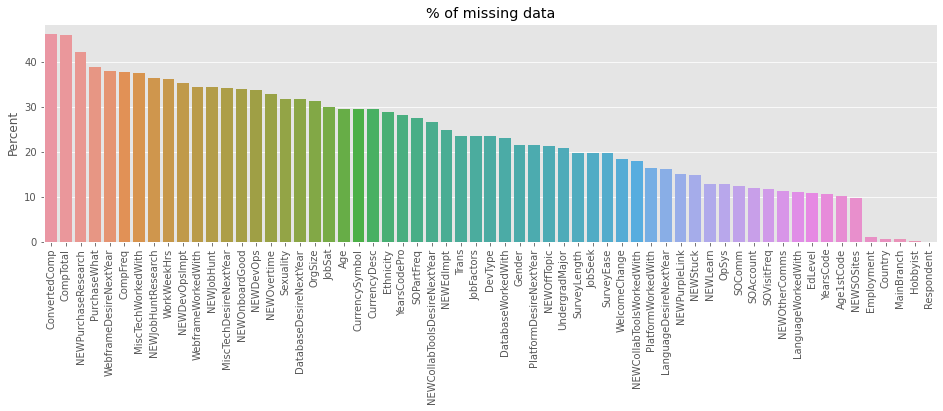

In [9]:
# plot % of missing values
plt.figure(figsize = (16,4))
plt.title('% of missing data')
s = sns.barplot(x=missing_df_2020.index,y=missing_df_2020['Percent'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()    

In [10]:
# list columns with missing values < 25%
no_missing = set(df_2020.columns[df_2020.isnull().mean() < 0.25])
print(no_missing)

{'NEWOffTopic', 'MainBranch', 'NEWEdImpt', 'OpSys', 'JobSeek', 'EdLevel', 'NEWCollabToolsWorkedWith', 'PlatformDesireNextYear', 'WelcomeChange', 'SOComm', 'LanguageDesireNextYear', 'SurveyLength', 'DevType', 'DatabaseWorkedWith', 'Age1stCode', 'Respondent', 'NEWPurpleLink', 'Trans', 'NEWLearn', 'YearsCode', 'JobFactors', 'SOAccount', 'SurveyEase', 'LanguageWorkedWith', 'PlatformWorkedWith', 'Country', 'Gender', 'Employment', 'NEWStuck', 'SOVisitFreq', 'NEWSOSites', 'UndergradMajor', 'Hobbyist', 'NEWOtherComms'}


## 2020 Handling missing values

**There was no need to handlde missing values (remove or inpute was not used), as I worked on categorical level only. The plotly graphs didn't require any manipulation of missing values as there were built based on value_counts() method.**

**2011 data**

In [15]:
# Import csv, adding encoding to avoid errors when reading old data format.
df_2011 = pd.read_csv('2011_survey_results_public.csv',encoding='ISO-8859-1') 

In [16]:
# check columns and rows
print("Stack Overflow 2011 Survey Results - rows:",df_2011.shape[0]," columns:", df_2011.shape[1])

Stack Overflow 2011 Survey Results - rows: 2814  columns: 65


In [17]:
# Check the survey data
pd.set_option('display.max_columns', None)
df_2011.head()

,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you work in?,Which best describes the size of your company?,Which of the following best describes your occupation?,How likely is it that a recommendation you make will be acted upon?,What is your involvement in purchasing? You can choose more than 1.,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,What types of purchases are you involved in?,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,"What is your budget for outside expenditures (hardware, software, consulting, etc) for 2011?",Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,What type of project are you developing?,Which languages are you proficient in?,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,What operating system do you use the most?,Please rate your job/career satisfaction,"Including bonus, what is your annual compensation in USD?",Which technology products do you own? (You can choose more than one),Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,"In the last 12 months, how much money have you spent on personal technology-related purchases?",Which of our sites do you frequent most?
0,Response,Response,Response,Response,Response,Response,Response,Response,Influencer,Recommender,Approver,Purchaser,Check Writer,No Involvement,I'm a Seller,Hardware,Servers,Software,"User Equipment: Monitors, PCs, Laptops",Consultants,Other,"<$10,000","$10,001 - $25,000","$25,001 - $40,000","$41,000 - $75,000","$75,001 - $100,000","$100,001 - $150,000",">$150,000",Don't know,Response,Java,JavaScript,CSS,PHP,Python,Ruby,SQL,C#,C++,C,Perl,None,other (please specify),Response,Response,Response,iPhone,Android,Blackberry,Other Smart Phone,Regular Mobile Phone,Kindle,Nook,Blu-Ray,HDTV,AppleTV,iPad,Other netbook,PS3,Xbox,Wii,Other gaming system,other (please specify),Response,Response
1,Africa,NaN,< 20,<2,Consulting,Start Up (1-25),Web Application Developer,Not in a million years,NaN,NaN,Approver,NaN,NaN,NaN,NaN,NaN,NaN,Software,NaN,NaN,NaN,NaN,NaN,"$25,001 - $40,000",NaN,NaN,NaN,NaN,NaN,Mobile,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Linux,FML,Student / Unemployed,iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<$100,NaN
2,Other Europe,NaN,25-29,41310,Software Products,Mature Small Business (25-100),Server Programmer,It's been known to happen,NaN,NaN,NaN,NaN,NaN,No Involvement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enterprise,Java,NaN,NaN,NaN,NaN,NaN,SQL,NaN,NaN,C,NaN,NaN,NaN,Windows 7,So happy it hurts,NaN,iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other netbook,NaN,NaN,NaN,NaN,NaN,$251-$500,Stack Overflow
3,India,NaN,25-29,41435,Software Products,Mid Sized (100-999),Server Programmer,Unless it's stoopid it gets done,NaN,NaN,NaN,NaN,NaN,NaN,I'm a Seller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SaaS,Java,JavaScript,NaN,NaN,NaN,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Linux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Germany,NaN,< 20,41310,Foundation / Non-Profit,Student,Student,It's been known to happen,NaN,NaN,NaN,NaN,NaN,No Involvement,NaN,NaN,NaN,NaN,"User Equipment: Monitors, PCs, Laptops",NaN,NaN,"<$10,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Haskell,Linux,I enjoy going to work,Student / Unemployed,NaN,NaN,NaN,NaN,Regular Mobile Phone,Kindle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wii,Other gaming system,NaN,"$501-$1,000",Stack Overflow


**It seems that multiple choice answers were split in single columns.** Example: *Which languages are you proficient in?*

In [18]:
# check details about raws and columns - there are many Unnamed columns!
df_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2814 entries, 0 to 2813
Data columns (total 65 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   What Country or Region do you live in?                                                           2814 non-null   object
 1   Which US State or Territory do you live in?                                                      1030 non-null   object
 2   How old are you?                                                                                 2730 non-null   object
 3   How many years of IT/Programming experience do you have?                                         2730 non-null   object
 4   How would you best describe the industry you work in?                                            2730 non-null   object
 5   Which best de

**2011 Missing Data**

In [19]:
# check % of missing vlaues per column
total_df_2011 = df_2011.isnull().sum().sort_values(ascending = False)
percent = (df_2011.isnull().sum()/df_2011.isnull().count()*100).sort_values(ascending = False)
missing_df_2011  = pd.concat([total_df_2011, percent], axis=1,keys = ['Total','Percent'])
missing_df_2011

,Total,Percent
Unnamed: 41,2793,99.253731
Unnamed: 52,2774,98.578536
Unnamed: 25,2771,98.471926
Unnamed: 26,2769,98.400853
Unnamed: 24,2769,98.400853
...,...,...
Which best describes the size of your company?,167,5.934613
How would you best describe the industry you work in?,84,2.985075
How many years of IT/Programming experience do you have?,84,2.985075
How old are you?,84,2.985075


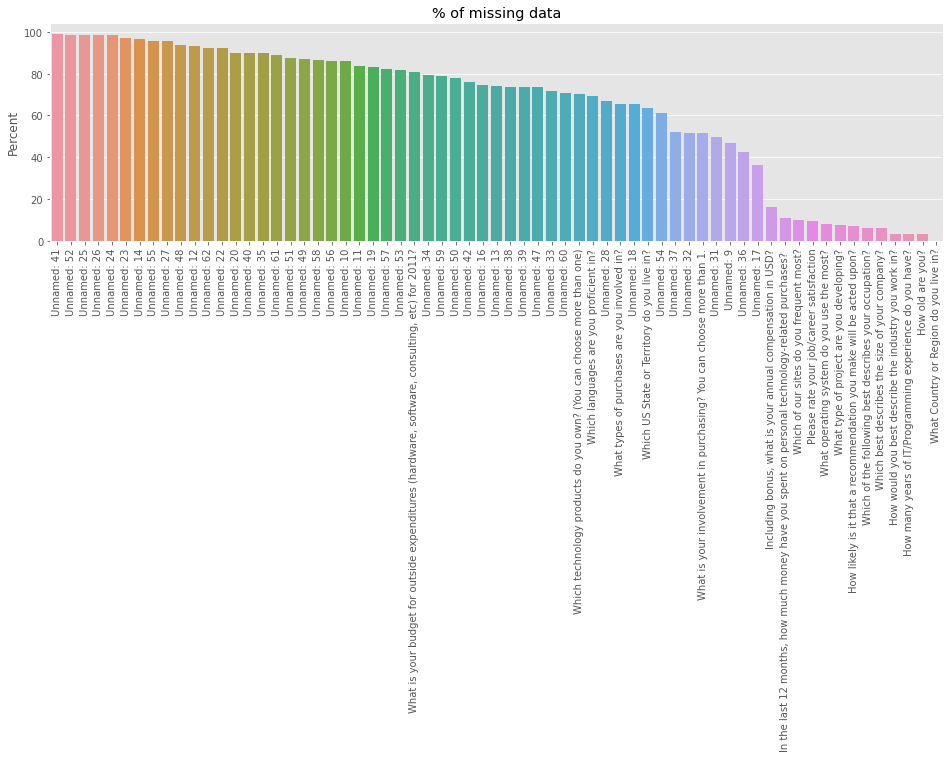

In [20]:
# plot % of missing values
plt.figure(figsize = (16,4))
plt.title('% of missing data')
s = sns.barplot(x=missing_df_2011.index,y=missing_df_2011['Percent'])
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()    

In [21]:
# list columns with missing values < 25%
missing_2011 = set(df_2011.columns[df_2011.isnull().mean() < 0.25])
print(missing_2011)

{'Including bonus, what is your annual compensation in USD?', 'What Country or Region do you live in?', 'What type of project are you developing?', 'How likely is it that a recommendation you make will be acted upon?', 'Which best describes the size of your company?', 'How old are you?', 'What operating system do you use the most?', 'How many years of IT/Programming experience do you have?', 'Please rate your job/career satisfaction', 'How would you best describe the industry you work in?', 'Which of the following best describes your occupation?', 'Which of our sites do you frequent most?', 'In the last 12 months, how much money have you spent on personal technology-related purchases? '}


## 2011 Handling missing values

**There was no need to handlde missing values (remove or inpute was not used), as I worked on categorical level only. The plotly graphs didn't require any manipulation of missing values as there were built based on value_counts() method.**

# 3 Data Preparation

The 2011 data is split wihtin many unnamed colums. The columns will be renamed and a new dataframe will be created based on which a graph could be billed.

In [25]:
# rename unnamed columns
df_2011.rename(columns={'Which languages are you proficient in?':'Java',
                                  'Unnamed: 31':'JavaScript',
                                  'Unnamed: 32':'CSS',
                                  'Unnamed: 33': 'PHP',
                                  'Unnamed: 34' : 'Python',
                                  'Unnamed: 35' : 'Ruby',
                                  'Unnamed: 36' : 'SQL',
                                  'Unnamed: 37' : 'C#',
                                  'Unnamed: 38' : 'C++',
                                  'Unnamed: 39' : 'C',
                                  'Unnamed: 40' : 'Perl',
                                  'Unnamed: 41' : 'N',
                                  'Unnamed: 42' : 'Other'}, inplace=True)

In [26]:
df_2011.head()

,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you work in?,Which best describes the size of your company?,Which of the following best describes your occupation?,How likely is it that a recommendation you make will be acted upon?,What is your involvement in purchasing? You can choose more than 1.,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,What types of purchases are you involved in?,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,"What is your budget for outside expenditures (hardware, software, consulting, etc) for 2011?",Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,What type of project are you developing?,Java,JavaScript,CSS,PHP,Python,Ruby,SQL,C#,C++,C,Perl,N,Other,What operating system do you use the most?,Please rate your job/career satisfaction,"Including bonus, what is your annual compensation in USD?",Which technology products do you own? (You can choose more than one),Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,"In the last 12 months, how much money have you spent on personal technology-related purchases?",Which of our sites do you frequent most?
0,Response,Response,Response,Response,Response,Response,Response,Response,Influencer,Recommender,Approver,Purchaser,Check Writer,No Involvement,I'm a Seller,Hardware,Servers,Software,"User Equipment: Monitors, PCs, Laptops",Consultants,Other,"<$10,000","$10,001 - $25,000","$25,001 - $40,000","$41,000 - $75,000","$75,001 - $100,000","$100,001 - $150,000",">$150,000",Don't know,Response,Java,JavaScript,CSS,PHP,Python,Ruby,SQL,C#,C++,C,Perl,None,other (please specify),Response,Response,Response,iPhone,Android,Blackberry,Other Smart Phone,Regular Mobile Phone,Kindle,Nook,Blu-Ray,HDTV,AppleTV,iPad,Other netbook,PS3,Xbox,Wii,Other gaming system,other (please specify),Response,Response
1,Africa,NaN,< 20,<2,Consulting,Start Up (1-25),Web Application Developer,Not in a million years,NaN,NaN,Approver,NaN,NaN,NaN,NaN,NaN,NaN,Software,NaN,NaN,NaN,NaN,NaN,"$25,001 - $40,000",NaN,NaN,NaN,NaN,NaN,Mobile,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Linux,FML,Student / Unemployed,iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<$100,NaN
2,Other Europe,NaN,25-29,41310,Software Products,Mature Small Business (25-100),Server Programmer,It's been known to happen,NaN,NaN,NaN,NaN,NaN,No Involvement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enterprise,Java,NaN,NaN,NaN,NaN,NaN,SQL,NaN,NaN,C,NaN,NaN,NaN,Windows 7,So happy it hurts,NaN,iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other netbook,NaN,NaN,NaN,NaN,NaN,$251-$500,Stack Overflow
3,India,NaN,25-29,41435,Software Products,Mid Sized (100-999),Server Programmer,Unless it's stoopid it gets done,NaN,NaN,NaN,NaN,NaN,NaN,I'm a Seller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SaaS,Java,JavaScript,NaN,NaN,NaN,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Linux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Germany,NaN,< 20,41310,Foundation / Non-Profit,Student,Student,It's been known to happen,NaN,NaN,NaN,NaN,NaN,No Involvement,NaN,NaN,NaN,NaN,"User Equipment: Monitors, PCs, Laptops",NaN,NaN,"<$10,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Haskell,Linux,I enjoy going to work,Student / Unemployed,NaN,NaN,NaN,NaN,Regular Mobile Phone,Kindle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wii,Other gaming system,NaN,"$501-$1,000",Stack Overflow


In [27]:
# check count of every language entry
print(df_2011['Java'].value_counts())
print(df_2011['JavaScript'].value_counts())
print(df_2011['CSS'].value_counts())
print(df_2011['PHP'].value_counts())
print(df_2011['Python'].value_counts())
print(df_2011['Ruby'].value_counts())
print(df_2011['SQL'].value_counts())
print(df_2011['C#'].value_counts())
print(df_2011['C++'].value_counts())
print(df_2011['C'].value_counts())

Java    862
Name: Java, dtype: int64
JavaScript    1420
Name: JavaScript, dtype: int64
CSS    1357
Name: CSS, dtype: int64
PHP    789
Name: PHP, dtype: int64
Python    576
Name: Python, dtype: int64
Ruby    286
Name: Ruby, dtype: int64
SQL    1614
Name: SQL, dtype: int64
C#    1353
Name: C#, dtype: int64
C++    741
Name: C++, dtype: int64
C    742
Name: C, dtype: int64


In [28]:
# create a new data frame with langguage count
df1 = pd.DataFrame({'Language': ['Java', 'JavaScript', 'CSS', 'PHP','Python','Ruby','SQL','C#','C++','C'],
                        'Count': [862, 1420, 1357, 789, 576, 286, 1614, 1353, 741, 742],},
                        index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(df1)

     Language  Count
0        Java    862
1  JavaScript   1420
2         CSS   1357
3         PHP    789
4      Python    576
5        Ruby    286
6         SQL   1614
7          C#   1353
8         C++    741
9           C    742


In [29]:
# calculate percent of each language 
for ind, row in df1.iterrows():
    df1.loc[ind, 'Percent'] = row['Count'] / df1['Count'].sum()
    
print(df1)

     Language  Count   Percent
0        Java    862  0.088501
1  JavaScript   1420  0.145791
2         CSS   1357  0.139322
3         PHP    789  0.081006
4      Python    576  0.059138
5        Ruby    286  0.029363
6         SQL   1614  0.165708
7          C#   1353  0.138912
8         C++    741  0.076078
9           C    742  0.076181


# 4.1 Evaluation: 2020 Answer Business Questions

**What are the most popular languages in 2020?**

In [33]:
eda = df_2020["LanguageWorkedWith"].value_counts().head(10)
df = pd.DataFrame({'labels': eda.index,
                   'values': eda.values
                  })
df.iplot(kind='pie',labels='labels',values='values', 
         title='2020 Languages', hole = 0.3)

Full stack web development and front-end development are the most reported within the 2020 Survey. Python and Java take also part in top 10.

**2020 Country Distirbution**


In [12]:
eda = df_2020["Country"].value_counts().head(10)
df = pd.DataFrame({'labels': eda.index,
                   'values': eda.values
                  })
df.iplot(kind='pie',labels='labels',values='values', 
         title='2020 Top 10 Countries', hole = 0.3)

**2020 Operating System**

In [14]:
eda = df_2020["OpSys"].value_counts()
df = pd.DataFrame({'labels': eda.index,
                   'values': eda.values
                  })
df.iplot(kind='pie',labels='labels',values='values', 
         title='2020 Operating System', hole = 0.3)

# 4.2 Evaluation: 2011 Answer Business Questions

### 2011 Data

In [22]:
eda = df_2011["What Country or Region do you live in?"].value_counts().head(10)
df = pd.DataFrame({'labels': eda.index,
                   'values': eda.values
                  })
df.iplot(kind='pie',labels='labels',values='values', 
         title='2011 Countries', hole = 0.3)

**2011 Operating System**

In [24]:
eda = df_2011["What operating system do you use the most?"].value_counts().head(5)
df = pd.DataFrame({'labels': eda.index,
                   'values': eda.values
                  })
df.iplot(kind='pie',labels='labels',values='values', 
         title='2011 Operating System', hole = 0.3)

**2011 Top Languages**

The data about languages is distributed in multiple unnamed columns. We have to play a little bit with the data to get most of it.

In [32]:
# plot the results
labels = df1['Language']
values = df1['Percent']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, title='2011 Languages',hole=.3)])
fig.show()